In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from scipy.stats import ttest_rel

In [2]:
df = pd.read_csv('results.csv')
df.head(3)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,game_winner,...,first_shooter,Shootout,team,scorer,minute,own_goal,penalty,Total attendance,Average attendance per game,year
0,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bart McGhee,23.0,False,False,434000,24139,1930
1,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Tom Florie,45.0,False,False,434000,24139,1930
2,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,United States,...,NaN,False,United States,Bert Patenaude,69.0,False,False,434000,24139,1930


In [16]:
# Filter the data to include only matches from the FIFA World Cup
fifa_world_cup_data = df[df['tournament'] == 'FIFA World Cup']

# Count the number of tournaments each team has participated in
tournaments_count = (fifa_world_cup_data['home_team'].value_counts() + fifa_world_cup_data['away_team'].value_counts()).fillna(0)
tournaments_count = tournaments_count.sort_values(ascending=False)
tournaments_count = pd.DataFrame(tournaments_count)
# Print the ranked list of teams based on attendance
tournaments_count


,count
Germany,532.0
Brazil,528.0
Argentina,356.0
Italy,333.0
France,303.0
...,...
Cuba,0.0
Indonesia,0.0
Israel,0.0
Qatar,0.0


C:\Users\calviem\AppData\Local\Temp\ipykernel_22796\934256864.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fifa_world_cup_data['year'] = pd.to_datetime(fifa_world_cup_data['date']).dt.year
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calvie

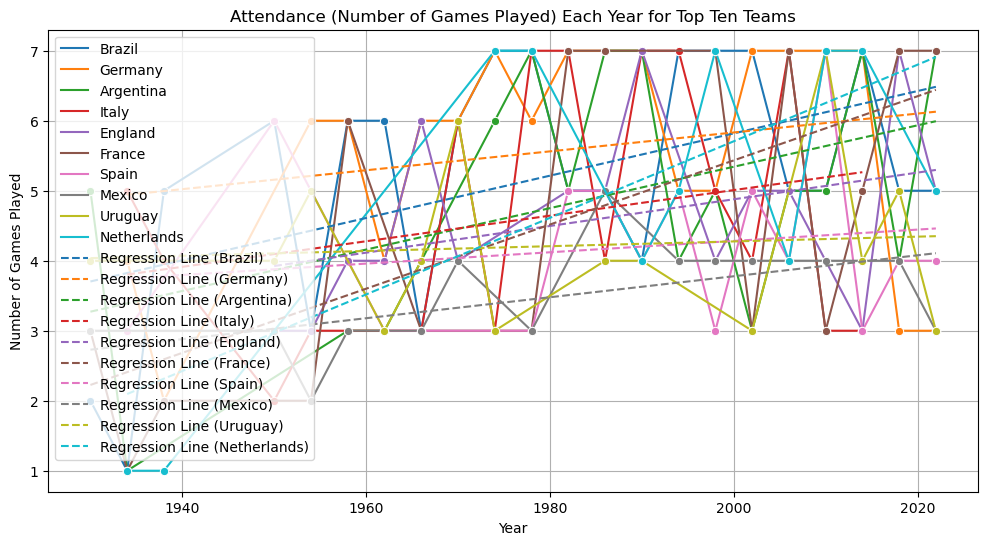

C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\calviem\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isin

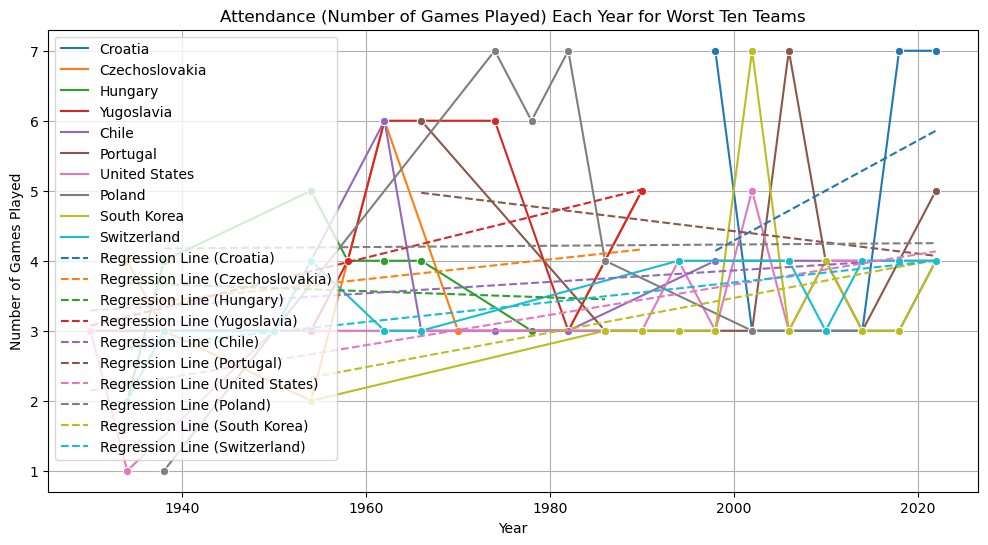

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read the data into a DataFrame
df = pd.read_csv('results.csv')

# Filter the data to include only matches from the FIFA World Cup
fifa_world_cup_data = df[df['tournament'] == 'FIFA World Cup']

# Combine home_team and away_team into a single column
teams = pd.concat([fifa_world_cup_data['home_team'], fifa_world_cup_data['away_team']], axis=0)

# Create a DataFrame to track the number of games played by each team
games_played = pd.DataFrame()

# Extract year from date and add it as a new column
fifa_world_cup_data['year'] = pd.to_datetime(fifa_world_cup_data['date']).dt.year

# Calculate the total number of games played by each team
team_games_count = teams.value_counts()

# Select top ten teams based on the total number of games played
top_ten_teams = team_games_count.nlargest(10).index

# Filter out teams that have played less than 50 games total
worst_teams_filtered = team_games_count[team_games_count >= 30].index
worst_ten_teams = team_games_count[team_games_count >= 30].nsmallest(10).index

# Calculate the number of games played each year for top ten teams
top_ten_games_played = pd.DataFrame()
for team in top_ten_teams:
    team_data = fifa_world_cup_data[(fifa_world_cup_data['home_team'] == team) | (fifa_world_cup_data['away_team'] == team)]
    games_per_year = team_data.groupby('year').size().reset_index(name='games_played')
    games_per_year['team'] = team
    top_ten_games_played = pd.concat([top_ten_games_played, games_per_year], ignore_index=True)

# Calculate the number of games played each year for worst ten teams
worst_ten_games_played = pd.DataFrame()
for team in worst_ten_teams:
    team_data = fifa_world_cup_data[(fifa_world_cup_data['home_team'] == team) | (fifa_world_cup_data['away_team'] == team)]
    games_per_year = team_data.groupby('year').size().reset_index(name='games_played')
    games_per_year['team'] = team
    worst_ten_games_played = pd.concat([worst_ten_games_played, games_per_year], ignore_index=True)

# Plot attendance (number of games played) each year for top ten teams
plt.figure(figsize=(12, 6))
sns.lineplot(data=top_ten_games_played, x='year', y='games_played', hue='team', marker='o')

# Add regression line for each team in top ten teams
for team in top_ten_teams:
    team_data = top_ten_games_played[top_ten_games_played['team'] == team]
    model = LinearRegression()
    model.fit(team_data[['year']], team_data['games_played'])
    plt.plot(team_data['year'], model.predict(team_data[['year']]), label=f'Regression Line ({team})', linestyle='--')

plt.title('Attendance (Number of Games Played) Each Year for Top Ten Teams')
plt.xlabel('Year')
plt.ylabel('Number of Games Played')
plt.legend()
plt.grid(True)
plt.show()

# Plot attendance (number of games played) each year for worst ten teams
plt.figure(figsize=(12, 6))
sns.lineplot(data=worst_ten_games_played, x='year', y='games_played', hue='team', marker='o')

# Add regression line for each team in worst ten teams
for team in worst_ten_teams:
    team_data = worst_ten_games_played[worst_ten_games_played['team'] == team]
    model = LinearRegression()
    model.fit(team_data[['year']], team_data['games_played'])
    plt.plot(team_data['year'], model.predict(team_data[['year']]), label=f'Regression Line ({team})', linestyle='--')

plt.title('Attendance (Number of Games Played) Each Year for Worst Ten Teams')
plt.xlabel('Year')
plt.ylabel('Number of Games Played')
plt.legend()
plt.grid(True)
plt.show()
